In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('midterm_results.xlsx')

df

,Öğrenci No,Doğru,Yanlış
0,2210343064,10,10
1,2200381011,10,10
2,2210630027,13,7
3,2200356025,18,2
4,2220344046,15,5
...,...,...,...
95,2220344072,16,4
96,2210357094,14,6
97,2210344024,13,7
98,NaN,12,8


In [8]:
df

,Öğrenci No,Doğru,Yanlış
0,2210343064,10,10
1,2200381011,10,10
2,2210630027,13,7
3,2200356025,18,2
4,2220344046,15,5
...,...,...,...
95,2220344072,16,4
96,2210357094,14,6
97,2210344024,13,7
98,NaN,12,8


In [9]:
# Create a new column for the number of empty answers
df['Doğru'] = pd.to_numeric(df['Doğru'], errors='coerce')
df['Yanlış'] = pd.to_numeric(df['Yanlış'], errors='coerce')
df['Boş'] = 20 - (df['Doğru'] + df['Yanlış'])

# Drop the first column (unnecessary)
df = df.drop(columns=['Öğrenci No'])

df

,Doğru,Yanlış,Boş
0,10,10,0
1,10,10,0
2,13,7,0
3,18,2,0
4,15,5,0
...,...,...,...
95,16,4,0
96,14,6,0
97,13,7,0
98,12,8,0


In [10]:
# Distribution tables
distribution_tables = df.describe()
print(distribution_tables)

# Additional metrics
variance = df.var()
skewness = df.skew()
kurtosis = df.kurt()

print("Variance:\n", variance)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)

            Doğru      Yanlış         Boş
count  100.000000  100.000000  100.000000
mean    13.830000    6.110000    0.060000
std      2.141721    2.093255    0.422116
min     10.000000    1.000000    0.000000
25%     12.000000    5.000000    0.000000
50%     14.000000    6.000000    0.000000
75%     15.000000    7.250000    0.000000
max     19.000000   10.000000    4.000000
Variance:
 Doğru     4.586970
Yanlış    4.381717
Boş       0.178182
dtype: float64
Skewness:
 Doğru     0.131239
Yanlış   -0.155397
Boş       8.606477
dtype: float64
Kurtosis:
 Doğru     -0.181965
Yanlış    -0.130293
Boş       78.895557
dtype: float64


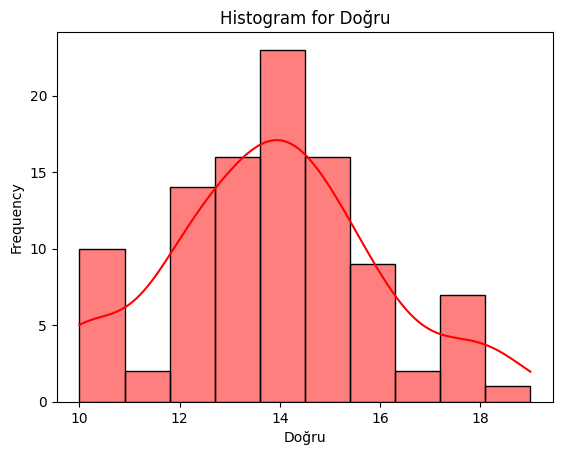

In [11]:
# Create a histogram with a distribution line for the 'Doğru' column
sns.histplot(df['Doğru'], kde=True, color='red', bins=10)
plt.title('Histogram for Doğru')
plt.xlabel('Doğru')
plt.ylabel('Frequency')
plt.show()



In [12]:
# Calculate the percentage of values lower than each unique value for 'Doğru' and 'Yanlış'
lower_than_true = [(df['Doğru'] < value).mean() * 100 for value in df['Doğru'].unique()]
lower_than_false = [(df['Yanlış'] < value).mean() * 100 for value in df['Yanlış'].unique()]

# Create a DataFrame to display the results
lower_than_table = pd.DataFrame({
    'Doğru': df['Doğru'].unique(),
    'Lower Than (%) Doğru': lower_than_true,
    'Yanlış': df['Yanlış'].unique(),
    'Lower Than (%) Yanlış': lower_than_false
})

print(lower_than_table)

   Doğru  Lower Than (%) Doğru  Yanlış  Lower Than (%) Yanlış
0     10                   0.0      10                   92.0
1     13                  26.0       7                   59.0
2     18                  92.0       2                    1.0
3     15                  65.0       5                   19.0
4     12                  12.0       8                   75.0
5     14                  42.0       6                   36.0
6     16                  81.0       4                   10.0
7     17                  90.0       3                    8.0
8     19                  99.0       9                   89.0
9     11                  10.0       1                    0.0


## **Conclusion/Sonuç**
*[EN]*

The mean of the correct answers in the midterm is 13.8, the standard deviation is 2.14, and the skewness value is 0.131. Showing a small positive skewness close to a normal distribution.
The fact that the mean number of correct answers is 13.8 (corresponding to about 35 points) and the standard deviation is about 2 indicates that the distribution of these correct answers is quite narrow.
In this case, we can say that the number of correct answers is generally between 11-16. In detail, 81% of the students were below 16 correct (corresponding to a maximum of 60 points).

It is seen that the grade expectation of the students when choosing this course is quite low. For this reason, this exam may have been an exam that students generally had difficulty with. 

*[TR]*

Vizede yapılan doğruların ortalaması 13.8, standart sapması 2.14, ve çarpıklık (skewness) değeri 0.131 dağılım normal dağılıma yakın küçük bir pozitif çarpıklık gösteriyor.
Doğru ortalamasının 13.8 (puan bazında yaklaşık 35'e tekabül ediyor) ve standart sapmasının yaklaşık 2 olması bize gösteriyor ki bu doğruların dağılımı oldukça dar bir dağılım gösteriyor.
Bu durumda öğrencilerin genelde doğru sayılarının 11-16 arasında olduğunu söyleyebiliriz. Ayrıntılı olarak incelemek gerekirse öğrencilerin %81'i 16 Doğrunun (puan bazında maksimum 60.'a tekabül ediyor) altında kalmıştır.

Öğrencilerin bu dersi seçerkenki not beklentisinin oldukça altında kaldığı görülmektedir. Bu sebeple yapılan bu sınav öğrencilerin genelde zorlandığı bir sınav olmuş olabilir. 

